In [1]:
###venn diagram
options(scipen=10000)

In [4]:
library(data.table)
library(ggplot2)
library(magrittr)
library(plyr)
library(dplyr)
library(RColorBrewer)
library(stringr)

In [13]:
# install.packages("ggvenn")
library(ggvenn)

In [7]:
# assign original colours to cell types
df_colours = data.frame(colours = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265",
                                    "#90C987","#CAE0AB","#F7EE55","#F6C141","#F1932D","#E8601C","#DC050C"),
                        celltype = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK","NK_R",
                                     "Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))
saige_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/from_wei/Feb24/"
data0 = fread(paste0(saige_dir,"/all_ct_loci.list.withCate.qvalue"), header=T, data.table=F)

In [8]:
head(data0)

,celltype,gene,R1,R2,R3,R4,R5,R6,pval_beta,pval_nominal,⋯,R3_Loci,R4_Loci,R5_Loci,R6_Loci,R1_topPval,R2_topPval,R3_topPval,R4_topPval,R5_topPval,R6_topPval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B_IN,A1BG,0.00170947,0.3706712,0.7981946,1.0000000,1.0000000,1.0000000,0.0040709,0.000006147731,⋯,19:57957633:T:A,19:57863937:T:C,19:58872853:G:C,19:58733610:G:T,0.0000113564,0.00402990,0.00845249,0.00692103,0.01196660,0.01037450
2,B_IN,A1BG.AS1,0.86506417,0.7648255,0.7769261,0.8074401,0.8690257,0.8953325,0.1423371,0.000411642098,⋯,19:58824721:C:T,19:57859145:G:T,19:57945146:T:A,19:58748944:G:A,0.0058832700,0.00940976,0.02022780,0.06795570,0.36375100,0.06017900
3,B_IN,A2M.AS1,0.03372643,0.8588731,0.9812090,0.8513040,0.9699506,0.8875360,0.6810340,0.002434185631,⋯,12:9352713:C:T,12:8735252:C:T,12:9019431:C:T,12:10180030:T:A,0.0003703240,0.00468252,0.01319110,0.01270180,0.01632800,0.01658600
4,B_IN,AAAS,0.75205437,0.8530099,0.8065299,0.8407649,0.8048025,0.8305645,0.6815684,0.002120635594,⋯,12:52724379:A:G,12:52790194:C:A,12:53369446:T:C,12:53272113:T:G,0.0014327100,0.00816973,0.00405493,0.05945150,0.06605680,0.01559110
5,B_IN,AACS,0.77396060,0.8927420,1.0000000,1.0000000,1.0000000,1.0000000,0.9105249,0.002389703695,⋯,12:126340960:G:A,12:125440950:T:C,12:125452272:C:G,12:124989178:C:T,0.0013218400,0.00351769,0.00880461,0.00670560,0.00494218,0.00804547
6,B_IN,AAED1,0.09593074,0.6161421,0.7516514,0.8153506,0.8275136,0.9096267,0.6706081,0.002944861049,⋯,9:98932408:T:C,9:100371876:A:G,9:99234329:C:T,9:98806319:C:A,0.0012525400,0.00974049,0.00611698,0.00757482,0.00231567,0.01464380


In [10]:
fig_dir <- "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/weis_figures/"

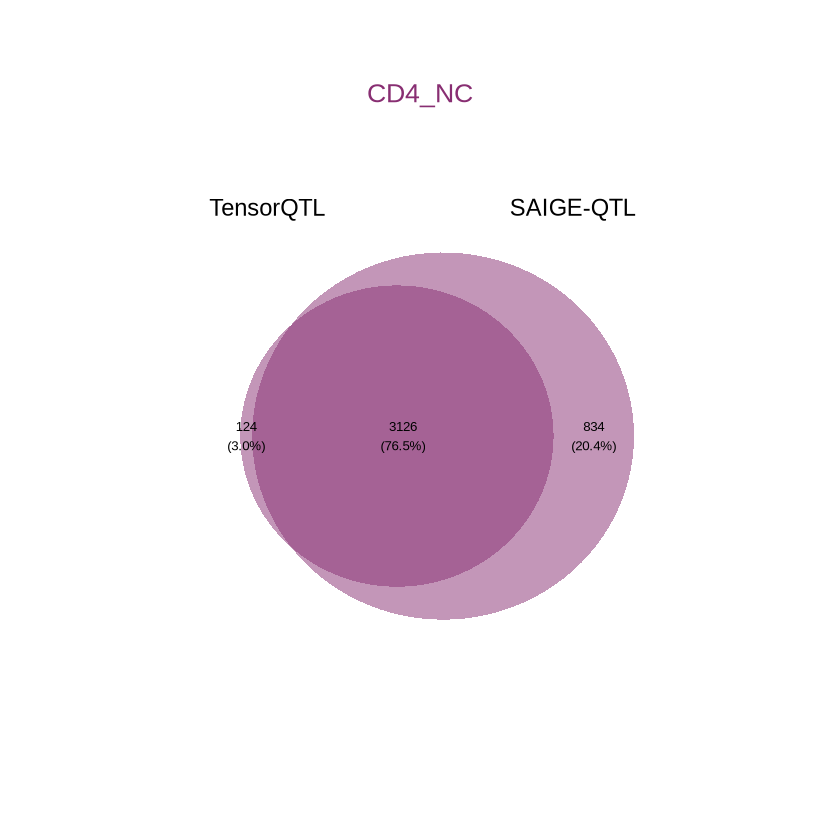

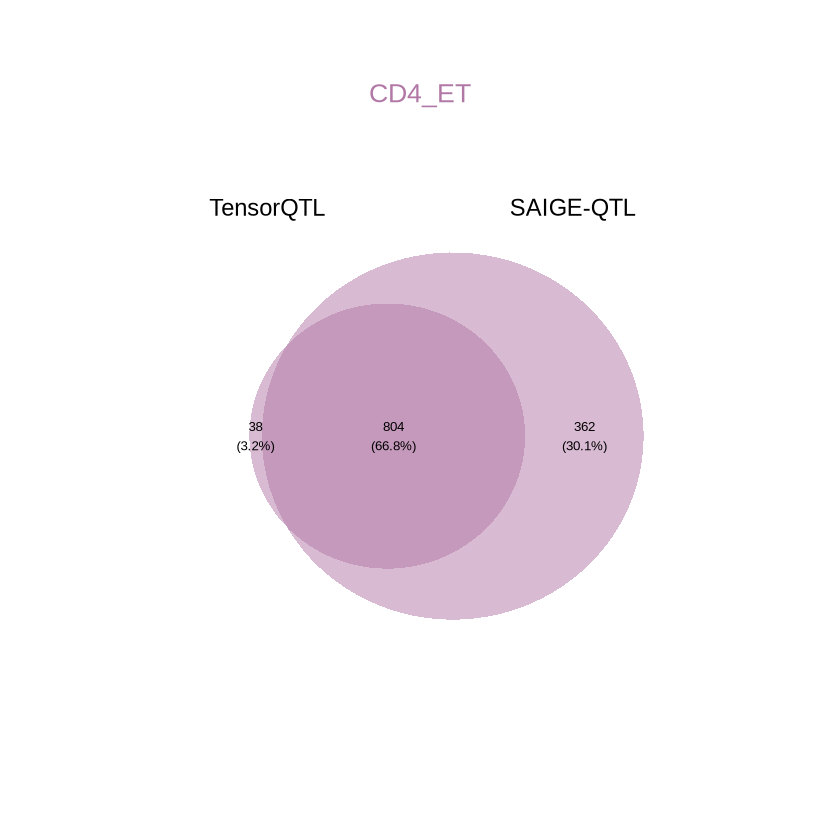

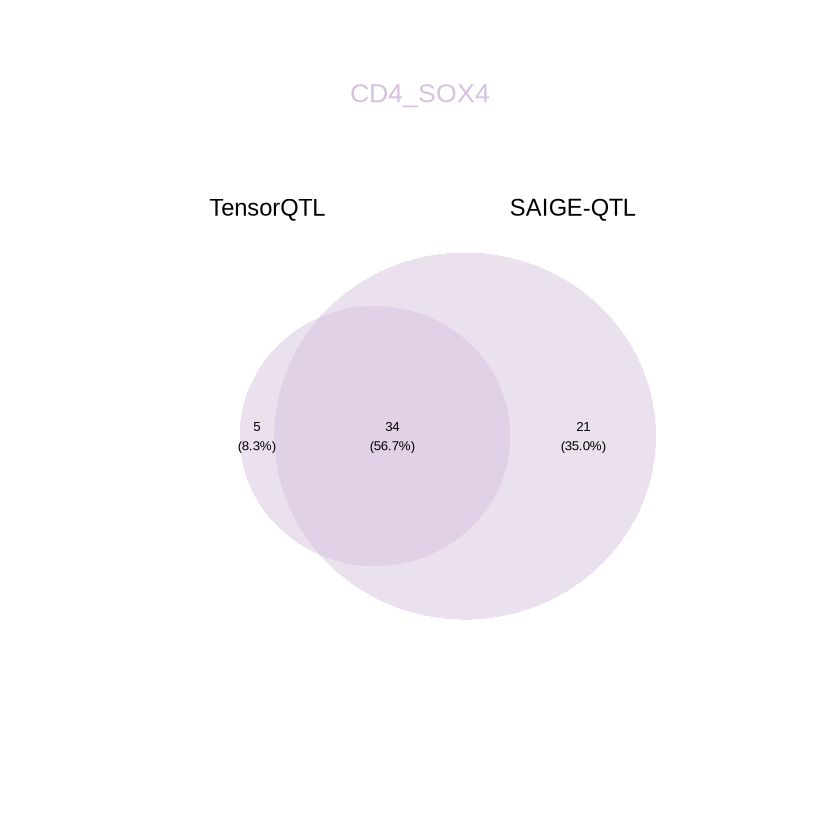

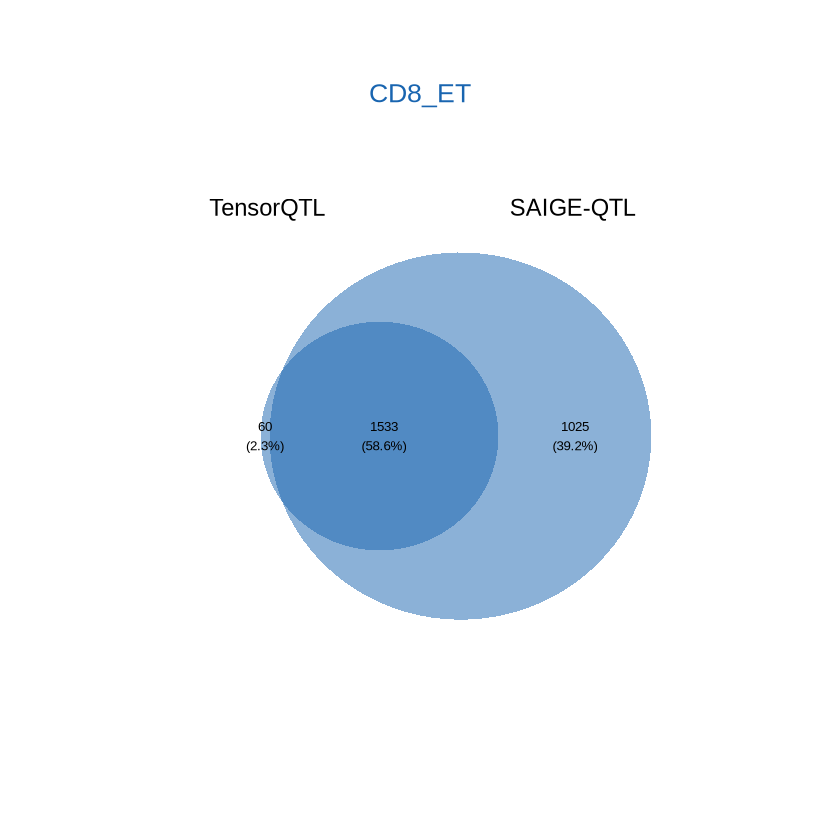

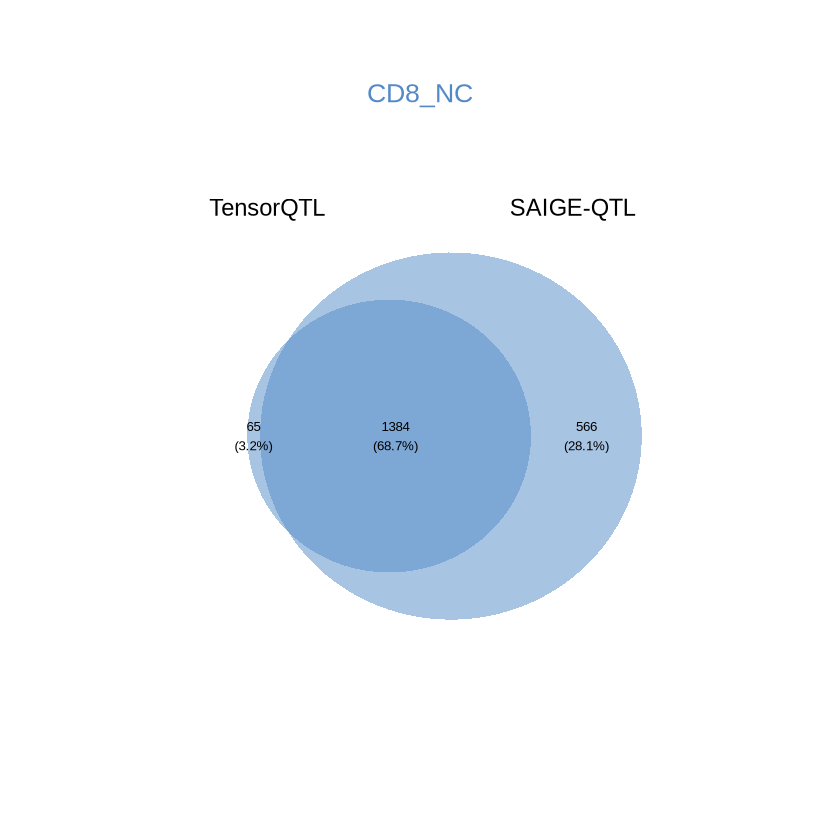

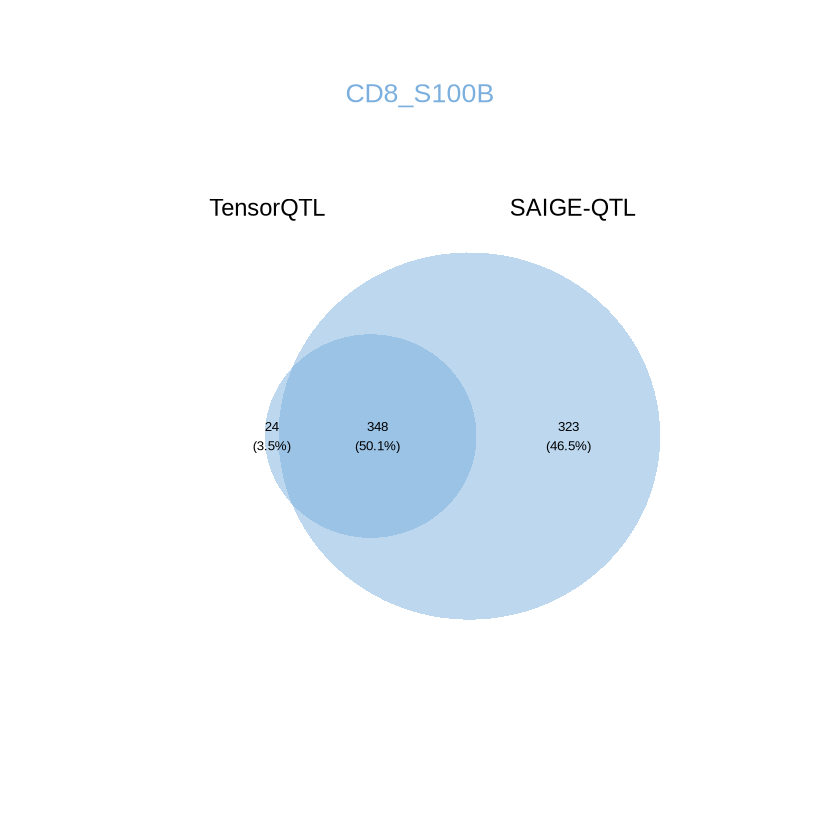

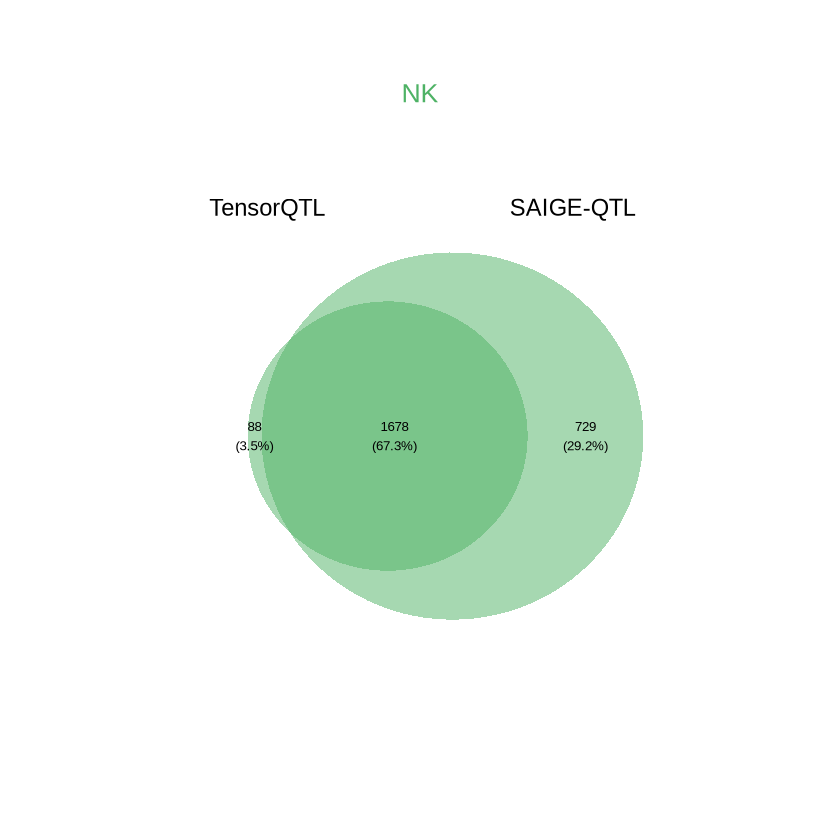

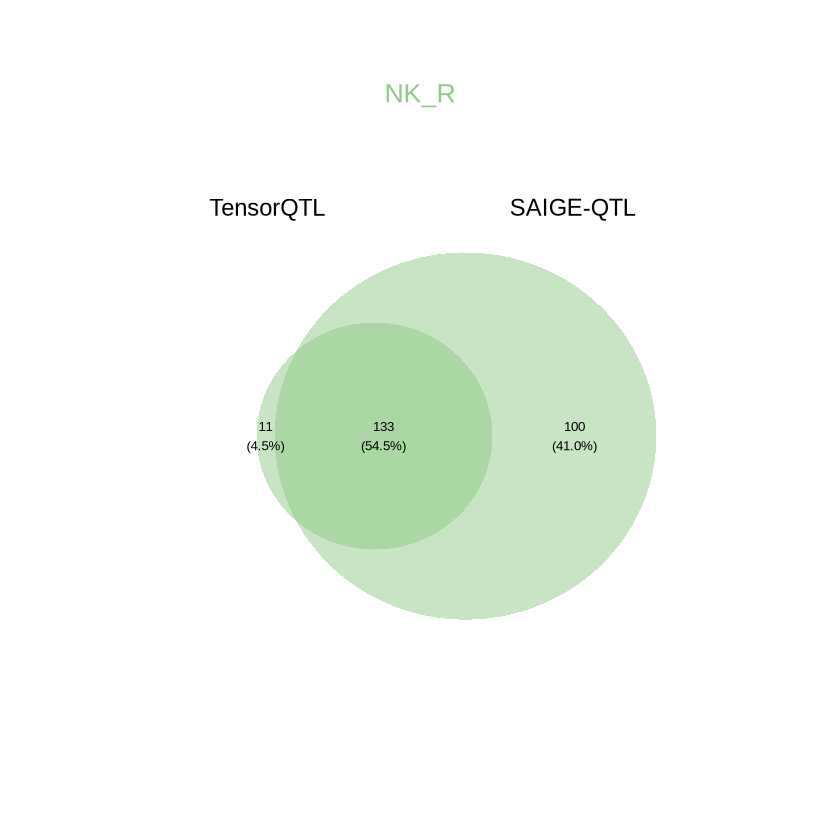

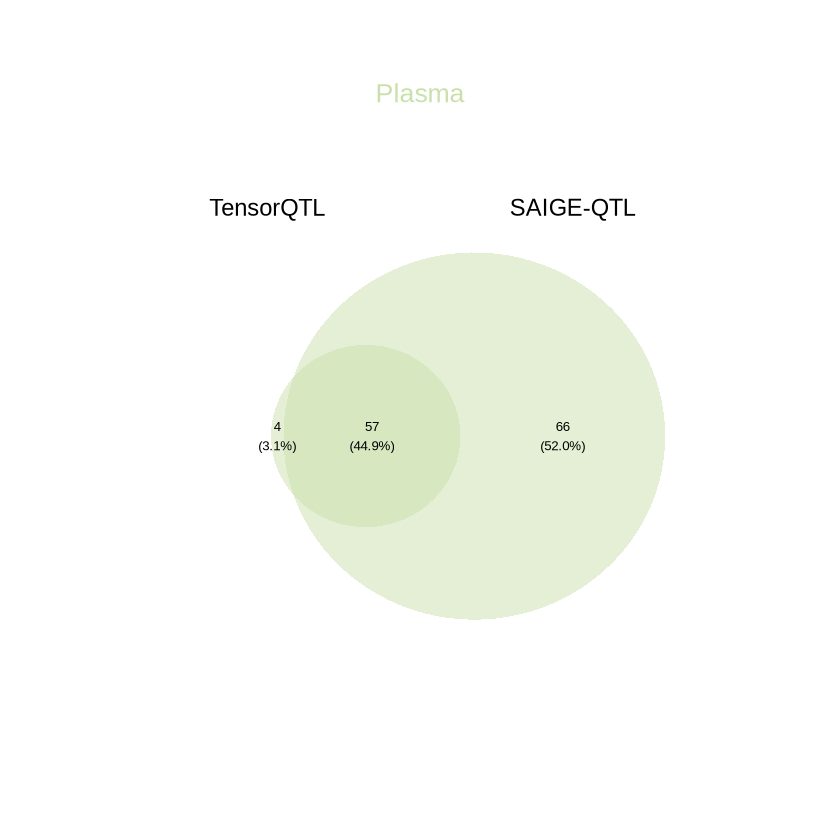

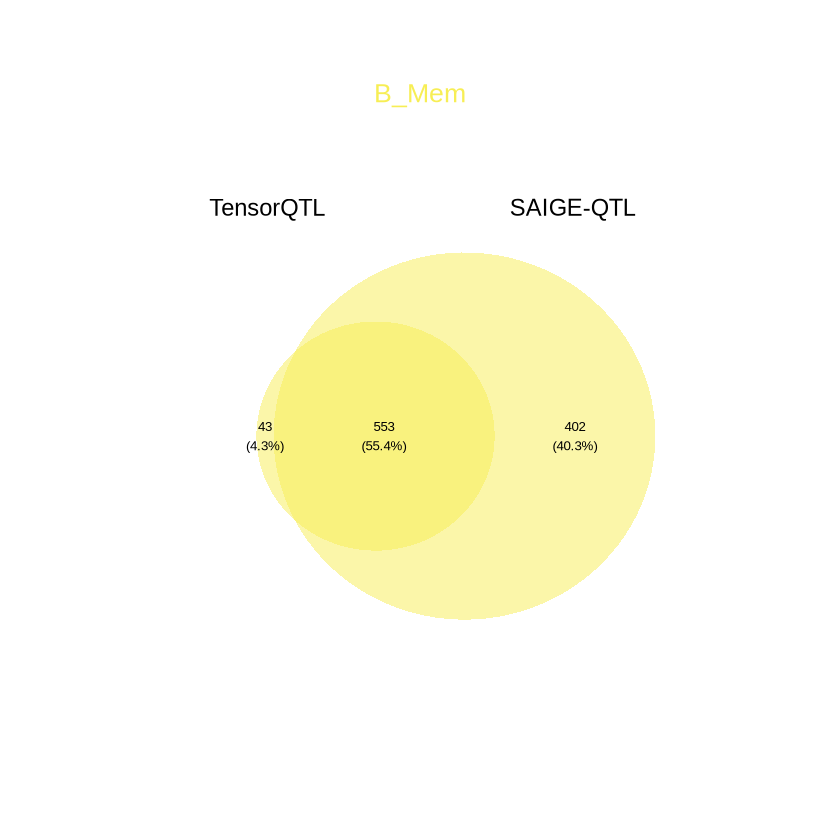

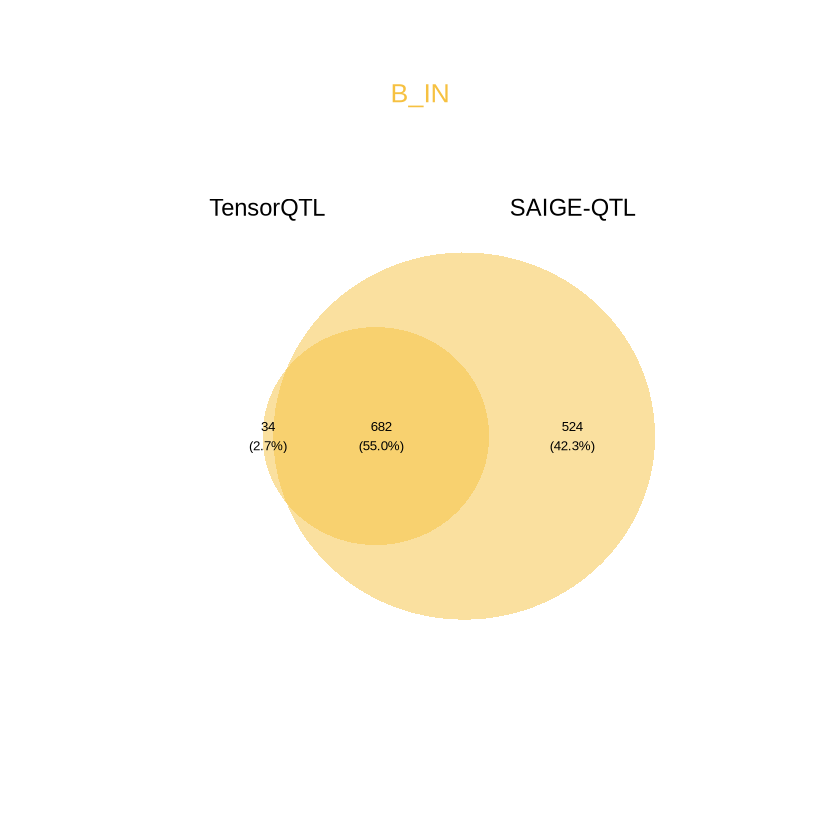

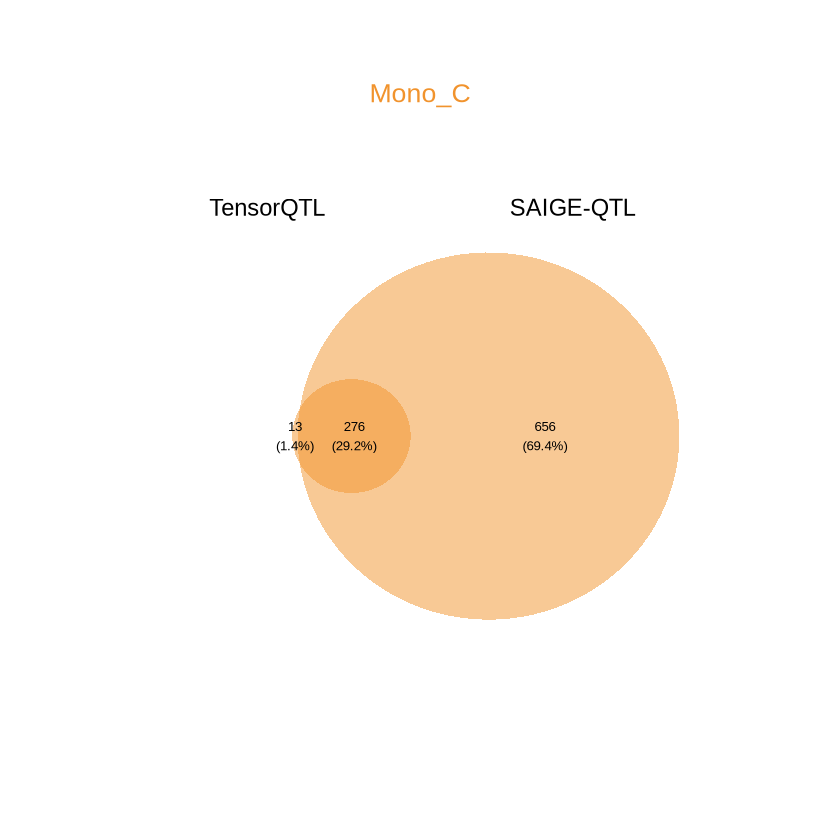

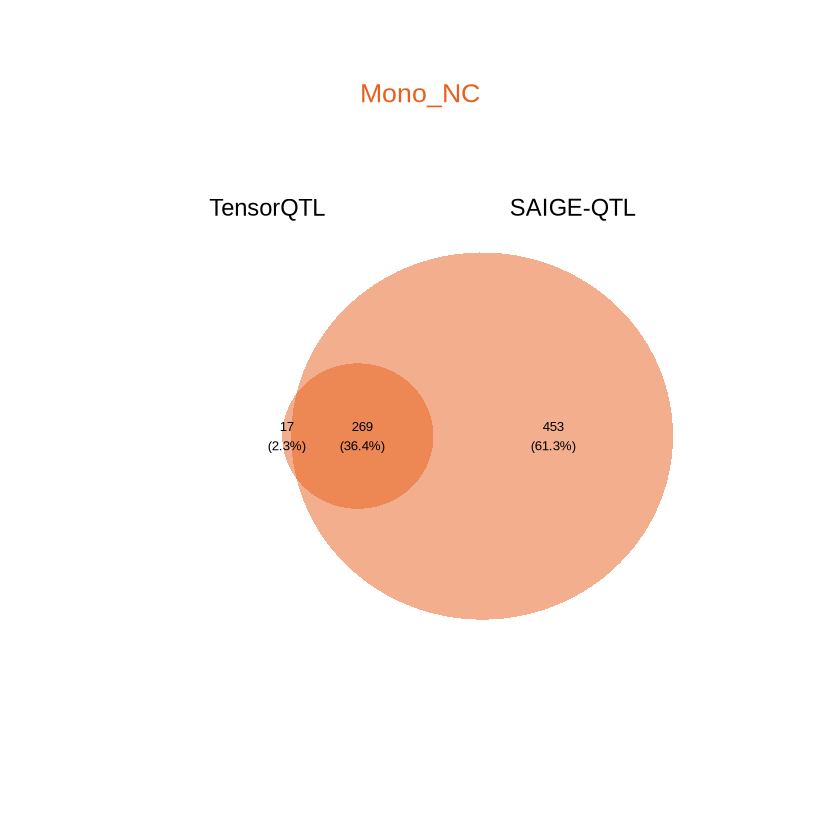

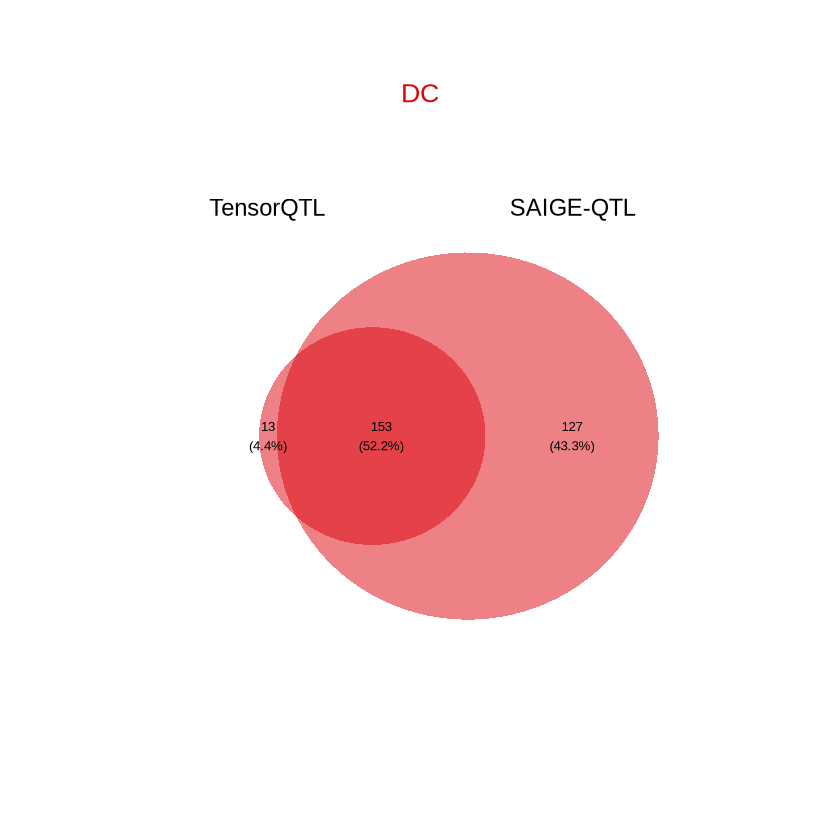

In [12]:
for(celltype in df_colours$celltype){
  data = data0[which(data0$celltype == celltype),]
  genelist = data$gene[which(data$qval < 0.05 | data$R1_qvalue < 0.05)]
  genelistT = data$gene[which(data$qval < 0.05)]
  genelistS = data$gene[which(data$R1_qvalue < 0.05)]
  
  TensorQTL =  genelist%in%genelistT
  SAIGEQTL = genelist%in%genelistS
  dataplot = tibble(gene = genelist, TensorQTL = TensorQTL, SAIGEQTL=SAIGEQTL)
  #par(mar = c(bottom, left, top, right))
  #par(mar = c(2.1, 2.1, 2.1, 2.1))
  
  p1 = ggplot(dataplot) +
    geom_venn(aes(A = TensorQTL, B = SAIGEQTL),
              set_names = c("TensorQTL", "SAIGE-QTL"),
              show_outside=c("none"),
              auto_scale=TRUE,
              stroke_size=0,
              set_name_size = 5,
              text_size = 2.8,
              #position = position_jitter(width = 1, height = 1),
              #fill_color = c(df_colours$colours[which(df_colours$celltype == celltype)], "#FFC0CB")) + 
              fill_color = c(df_colours$colours[which(df_colours$celltype == celltype)], df_colours$colours[which(df_colours$celltype == celltype)])) + 
    theme_void() + labs(title = celltype) + theme(plot.title = element_text(size=16, hjust = 0.5, vjust=-14, color=df_colours$colours[which(df_colours$celltype == celltype)]))
#   ggsave(paste0("venndiagram_",celltype,".jpeg"), p1, width = 5, height = 5)
    print(p1)
    pdf(paste0(fig_dir,"venndiagram_",celltype,".pdf"), width=6, height=6)
    print(p1)
    dev.off()
  
  
}

In [20]:
# Calculate increase in number of eGenes (%)
increased_pct = c()
for(celltype in df_colours$celltype){
    data = data0[which(data0$celltype == celltype),]
    genelist = data$gene[which(data$qval < 0.05 | data$R1_qvalue < 0.05)]
    genelistT = data$gene[which(data$qval < 0.05)]
    genelistS = data$gene[which(data$R1_qvalue < 0.05)]
    
    TensorQTL =  genelist%in%genelistT
    SAIGEQTL = genelist%in%genelistS
    dataplot = tibble(gene = genelist, TensorQTL = TensorQTL, SAIGEQTL=SAIGEQTL)
    
    n_tensor = sum(dataplot$TensorQTL)
    n_saige = sum(dataplot$SAIGEQTL)
    improv = (n_saige-n_tensor)/n_tensor
    increased_pct = c(increased_pct, improv)
  
}

In [21]:
increased_pct

[1] 0.2184615 0.3847981 0.4102564 0.6057753 0.3457557 0.8037634 0.3629672
 [8] 0.6180556 1.0163934 0.6023490 0.6843575 2.2249135 1.5244755 0.6867470

In [22]:
c(min(increased_pct),max(increased_pct),mean(increased_pct))

[1] 0.2184615 2.2249135 0.7492192